In [3]:
from environment import NormalMoveEnv
from experiment import Trajectory
from nn import BetaModel, Model, GeneralModel
from rl import Agent

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# %matplotlib inline

# Env

<AxesSubplot: >

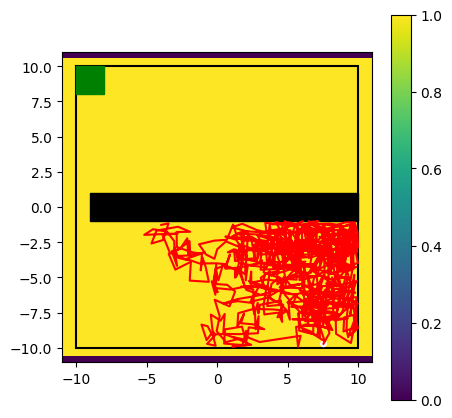

In [25]:
wall=[([-9.,-1.],[10., 1.])]
goal=[([-10.,8.],[-8.,10.])]
start=([0.,-9.9],[9.9,-7.])
env = NormalMoveEnv(start=start, goals=goal, walls=wall)

env.beta = lambda s: (s[1]>-10. and s[1]<10.)
# env = NormalMoveEnv()

t = Trajectory(env, size=1_000)
t.plot(env.plot())

# RL Model

Trajectory size: 1


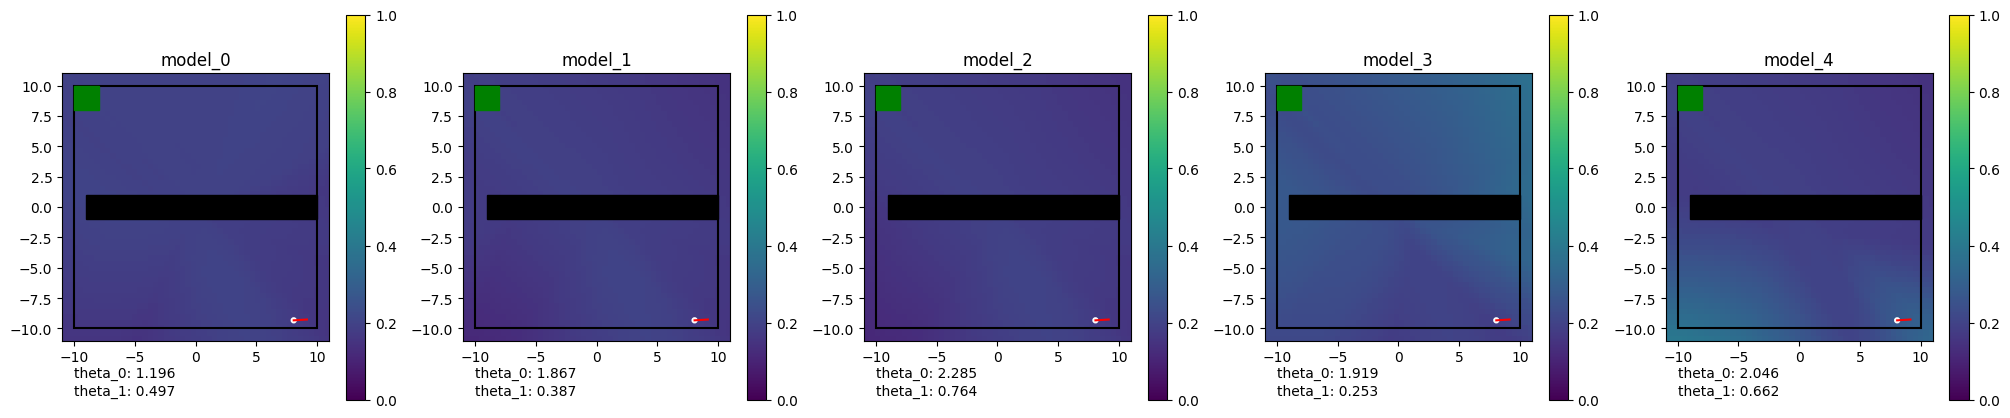

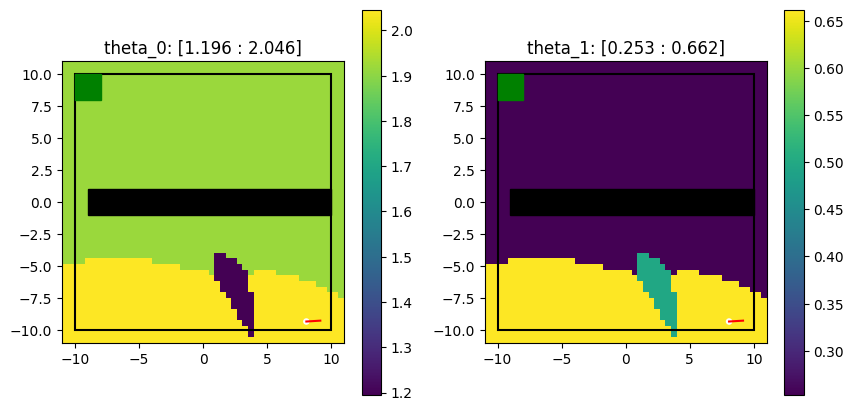

In [26]:
params = {'k':5, "lr":1e-5, 'momentum':.9}
a = Agent(env, td_model_steps=10, memory_size=50, model=Model, **params)
a.episode(size_limit=1)
a.plot(kind='probs')
a.plot()
print(f'Trajectory size: {a.trajectory.run.shape[0]}')

Trajectory size: 95


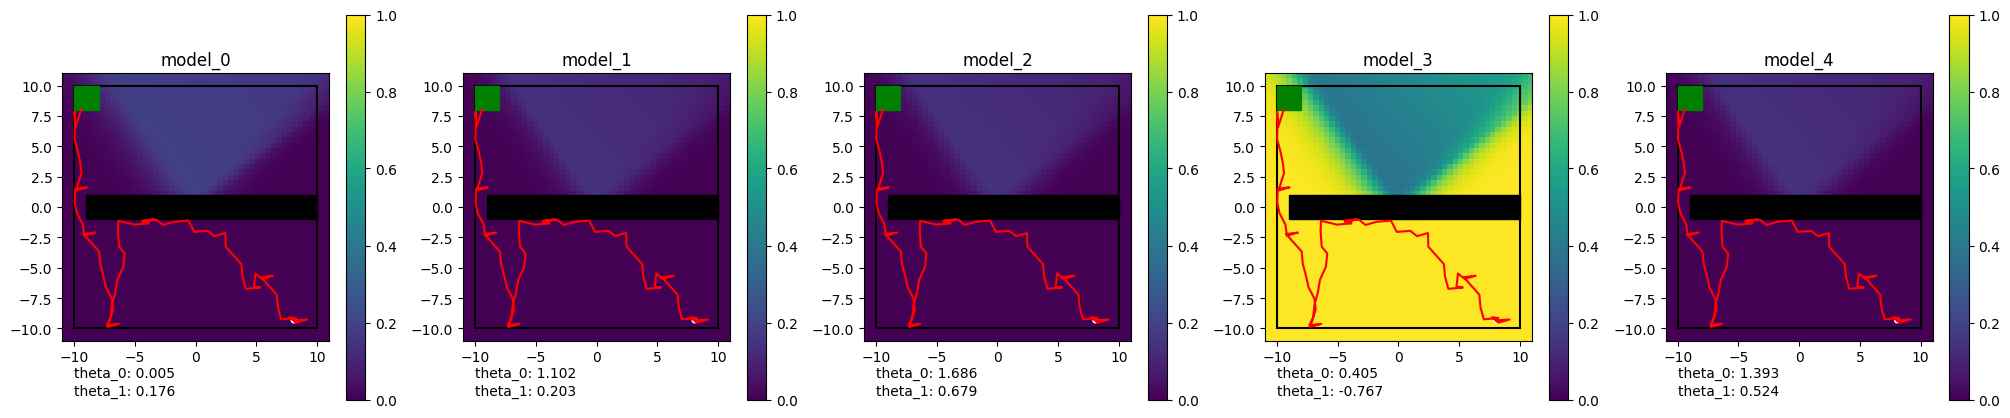

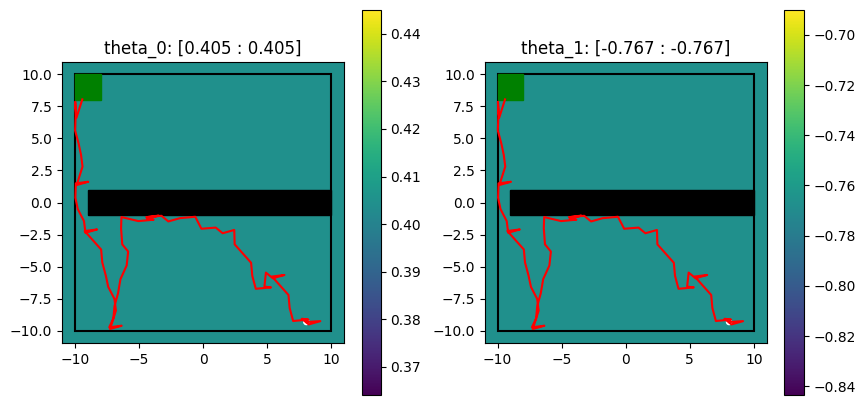

In [36]:
a.episode(size_limit=10)
a.plot(kind='probs')
a.plot()
print(f'Trajectory size: {a.trajectory.run.shape[0]}')

Trajectory size: 84


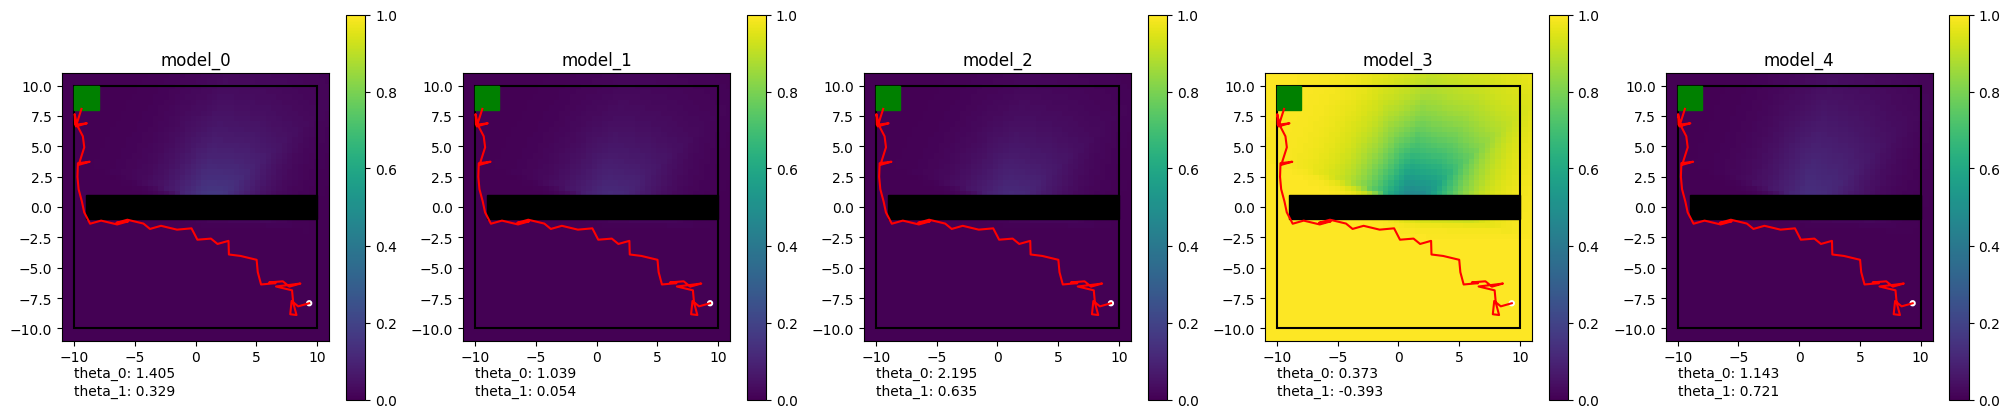

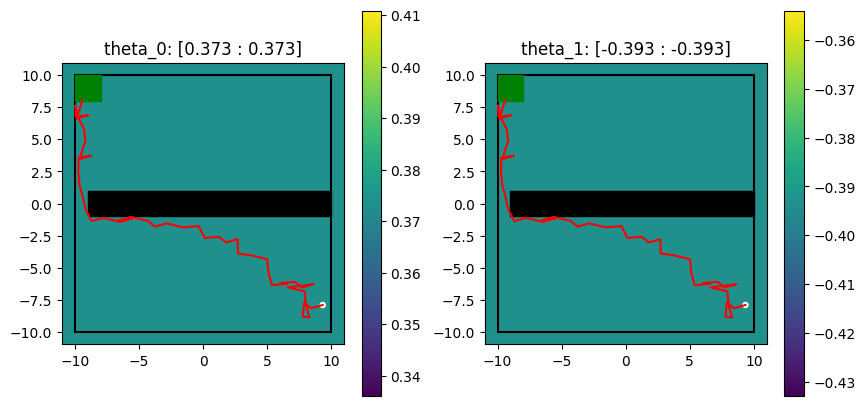

In [37]:
params = {'k':5, "lr":1e-5, 'momentum':.9}
a = Agent(env, td_model_steps=10, memory_size=50, model=Model, **params)
a.episode(size_limit=300)
a.plot(kind='probs')
a.plot()
print(f'Trajectory size: {a.trajectory.run.shape[0]}')

Trajectory size: 87


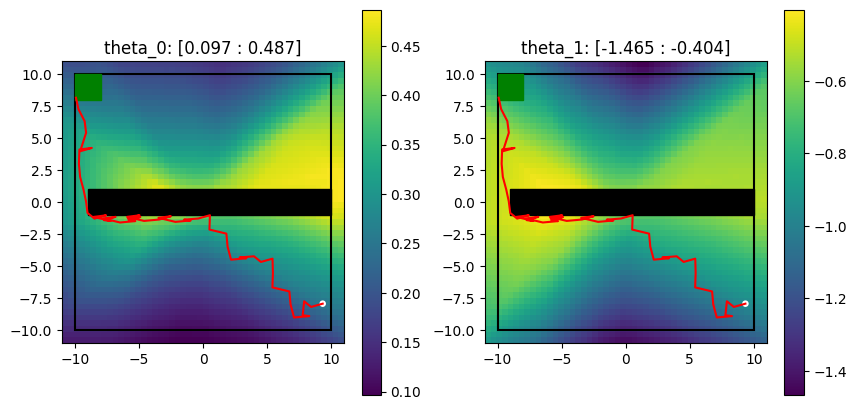

In [38]:
params = {"lr":1e-6, 'momentum':.9}
a = Agent(env, td_model_steps=10, memory_size=50, model=GeneralModel, **params)
a.episode(size_limit=300)
a.plot()
print(f'Trajectory size: {a.trajectory.run.shape[0]}')